In [5]:
import numpy as np
import pandas as pd

# set url of dataset
train_values_url = "../dataset/Warm_Up_Machine_Learning_with_a_Heart_-_Train_Values.csv"
train_labels_url = "../dataset/Warm_Up_Machine_Learning_with_a_Heart_-_Train_Labels.csv"

In [6]:
# load dataset
values_df = pd.read_csv(train_values_url)
labels_df = pd.read_csv(train_labels_url)

# concatenate values and labels
# https://pandas.pydata.org/pandas-docs/stable/merging.html
# dataset_df = pd.merge(values_df, labels_df, on=['patient_id', 'patient_id'])

# convert to nd-array
# dataset_nd = dataset_df.values

# print(dataset_nd)
# print(len(dataset_nd))
# print(len(dataset_nd[0]))

values_nd = values_df.values
labels_nd = labels_df.values

# optional
# drop null value
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
# dataset_df.dropna()
# Actually, nothing was dropped here.

# dataset_ndarr = dataset_df.values
ids_nd = values_nd[:, 0]
X_nd = values_nd[:, 1:]
# ids_nd, X_nd = np.split(values_df.values, [1], axis=1)
y_nd = labels_nd[:, -1]

# print(ids_nd)
# print(type(ids_nd))

# print(X_nd)
# print(type(X_nd))

# print(y_nd)
# print(type(y_nd))

In [56]:
# separate into values and labels
# ids, train = np.split(dataset_ndarr, [1], axis=1)
# values, labels = np.split(train, [-1], axis=1)

# flatten labels
# labels_list = labels.flatten().tolist()

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline

# one hot encoder for categoricalize
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
# https://stackoverflow.com/questions/43588679/issue-with-onehotencoder-for-categorical-features
ct = ColumnTransformer(
    [('enc', OneHotEncoder(), [1])],
    remainder='passthrough'
)

# normalizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer
norm = Normalizer()

# build the preprocessing pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
prep = Pipeline(
    [('ct', ct), 
     ('norm', norm)]
)

# fit the preprocessing pipeline
prep.fit(X_nd)

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_nd, y_nd, test_size=0.15)

# print(X_train)
# print(len(X_train))
# print(len(X_train[0]))
# print()

# print(X_test)
# print(len(X_test))
# print()

# print(y_train)
# print(len(y_train))
# print()

# print(y_test)
# print(len(y_test))
# print()

# transform on X_train and X_test
X_train_pp = prep.transform(X_train)
X_test_pp = prep.transform(X_test)

# print("pre-processed train X: ")
# print(X_train_pp)
# print(len(X_train_pp))
# print(len(X_train_pp[0]))
# print()

# convert y to list
y_train_list = list(y_train)
y_test_list = list(y_test)

In [154]:
# regressors
from sklearn.tree import DecisionTreeRegressor as DT
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor as NN
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
from sklearn.linear_model import LogisticRegression as LR
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

from sklearn.neural_network import MLPClassifier as MLP
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier as Bagging
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.ensemble import GradientBoostingClassifier as GB
from xgboost import XGBClassifier as XGB
# conda install -c conda-forge xgboost

# metrics
from sklearn.metrics import log_loss, accuracy_score

models = {
    'DT': DT(),
    'NN': NN(),
    'LR': LR(),
    'MLP': MLP(),
    'SVC': SVC(),
    'NB': NB(),
    'KNN': KNN(),
    'Bagging': Bagging(),
    'RF': RF(),
    'AdaBoost': AdaBoost(),
    'GB': GB(),
    'XGB': XGB(),
}
param_dict = {
    # 0.67 {'max_depth': 1, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
    'DT': {
        'max_depth': [1,2,3,None],
        'max_leaf_nodes': [4,6,8,10,None],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [2,4,6]
    },
    # 0.40 {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 50), 'max_iter': 2000}
    'NN': {
        'hidden_layer_sizes': [(100,100,50)],
        'activation': ['relu', 'tanh'],
        'max_iter': [500, 1000, 2000]
    },
    # LR 0.64 {'C': 5.0, 'class_weight': None, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'sag'}
    'LR': {
        "solver": ['lbfgs', 'liblinear', 'sag', 'saga'],
        "penalty": ['l2'],
        "C": [1.0, 1.5, 2.0, 5.0, 10],
        "fit_intercept": [True, False],
        "class_weight": [None, 'balanced']
    },
    # MLP 0.63 {'activation': 'tanh', 'early_stopping': False, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'invscaling', 'max_iter': 1000}
    'MLP': {
        "max_iter": [500, 1000, 2000],
        "hidden_layer_sizes": [(100,100,50)],
        "activation": ['tanh', 'relu'],
        "learning_rate": ['constant', 'invscaling', 'adaptive'],
        "early_stopping": [True, False],
    },
    # SVC 0.64 {'coef0': 0.5, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': False}
    'SVC': {
        "probability": [True],
#         "C": [5000, 10000, 20000, 30000],
        "kernel": ["poly", "rbf", "sigmoid"],
        "coef0": [0.0, 0.1, 0.2, 0.3, 0.5],
        "shrinking": [True, False],
        "gamma": ['scale', 'auto']
    },
    # NB 1.30 {}
    'NB': {
        # Nothing can be tuned
    },
    # KNN 0.71 {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
    'KNN': {
        "n_neighbors": [1, 2, 3, 5, 7],
        "weights": ['uniform', 'distance'],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "p": [1, 2, 3]
    },
    # Bagging 0.56 {'max_features': 0.8, 'max_samples': 0.3, 'n_estimators': 100}
    'Bagging': {
          "n_estimators": [10, 20, 50, 100, 200],
          "max_samples": [0.01, 0.1, 0.3, 0.5],
          "max_features": [0.5, 0.8, 1.0]
    },
    # RF 0.58 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
    'RF': {
        "n_estimators": [10, 20, 50, 100],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "max_features": [None, "auto", "log2"]
    },
    # GB 0.38 {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
    'GB': {
          "learning_rate": [0.005, 0.01, 0.05, 0.1],
          "n_estimators": [5, 10, 50, 100],
          "max_depth": [5, 10, 20],
          "max_features": [None, "auto", "log2"]
    },
    # AdaBoost 0.63 {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 5}
    'AdaBoost': {
        "n_estimators": [5, 10, 20, 50, 100, 200],
        "learning_rate": [0.01, 0.1, 1],
        "algorithm": ["SAMME", "SAMME.R"],
    },
    # XGB 0.55 {'booster': 'gbtree', 'learning_rate': 0.1, 'min_child_weight': 10, 'n_estimators': 100}
    'XGB': {
        "learning_rate": [0.01, 0.1, 1],
        "n_estimators": [10, 100, 200, 500],
        "min_child_weight": [5, 10, 20],
        "booster": ['gbtree', 'gblinear', 'dart']
    }
}

# grid search cross validation
from sklearn.model_selection import GridSearchCV
model_name = 'GB'
model = models[model_name]
gscv = GridSearchCV(model, param_dict[model_name], cv=3, scoring="neg_log_loss")
gscv.fit(X_train_pp, y_train_list)

# test on test data
y_pred = gscv.predict_proba(X_test_pp)

# get metrics (log loss)
print(model_name,"%.2f" % log_loss(y_test_list, y_pred), gscv.best_params_)

# We only need the second column
y_pred = y_pred[:,-1]

# Show the predict result
show_df = pd.DataFrame(y_pred, columns=["y_predict"])
show_df['y_true'] = y_test_list

show_df

GB 0.58 {'learning_rate': 0.05, 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 50}


/Users/henry/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,y_predict,y_true
0,0.040413,1
1,0.200408,1
2,0.065060,0
3,0.441290,0
4,0.904760,1
5,0.196324,1
6,0.919939,1
7,0.057207,0
8,0.203435,0
9,0.517149,0


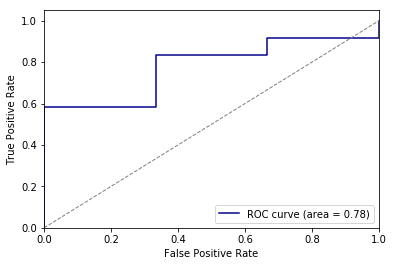

In [155]:
# Draw ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = y_test.astype(int)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Draw ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue',
         lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [51]:
# predict on test data
test_values_url = "../dataset/Warm_Up_Machine_Learning_with_a_Heart_-_Test_Values.csv"
test_df = pd.read_csv(test_values_url)
testset_ndarr = test_df.values
test_ids, test_values = np.split(testset_ndarr, [1], axis=1)

# test model
processed_test_values = prep.transform(test_values)

# print(processed_test_values)

test_pred = gscv.predict_proba(processed_test_values)

# print(test_pred)

In [52]:
# write to csv
header = labels_df.columns
col_id_name = header[0]
col_label_name = header[1]

test_ids_list = list(test_ids.flatten())

res_dict = {col_id_name: test_ids_list,
            col_label_name: test_pred[:,1]
           }

res_df = pd.DataFrame.from_dict(res_dict)

import time
# export to df
millis = int(round(time.time() * 1000))
output_path = "./" + str(millis) + ".csv"
res_df.to_csv(output_path, index=False)

# print(millis)
# print(type(millis))